In [55]:
import numpy as np
import os
import matplotlib.pyplot as plt
import jpegio
%matplotlib inline

In [56]:
cover_path = 'E:/JPEG_cover/ALASKA_v2_JPG_256_QF100_COLOR'
stego_path = 'E:/SSE_stego/SSE_stego_100'

In [57]:
def calc_residual(stego, cover):
    residual_y =  np.abs(stego.coef_arrays[0].astype(np.int16) - cover.coef_arrays[0].astype(np.int16)).astype(np.uint8)
    return residual_y

In [58]:
def show_img(cover_path: str, stego_path: str, count: int, multiple: int):
    fig = plt.figure(figsize=(25, 25))

    stego_filenames = os.listdir(stego_path)
    stego_filenames = list(filter(lambda x: x if x[-4:] == '.jpg' else None, stego_filenames))

    if count == -1:
        count = len(stego_filenames)

    i = 0
    for filename in stego_filenames[:count]:
        stego = jpegio.read(os.path.join(stego_path, filename))
        filename_c = filename[:-7] + '.jpg'
        cover = jpegio.read(os.path.join(cover_path, filename_c))

        residual_y = calc_residual(stego, cover) * multiple

        ax = fig.add_subplot(5, 5, i+1)
        ax.set_title(filename)
        ax.plot(5, 5)
        ax.imshow(residual_y, cmap = 'gray')
        i += 1

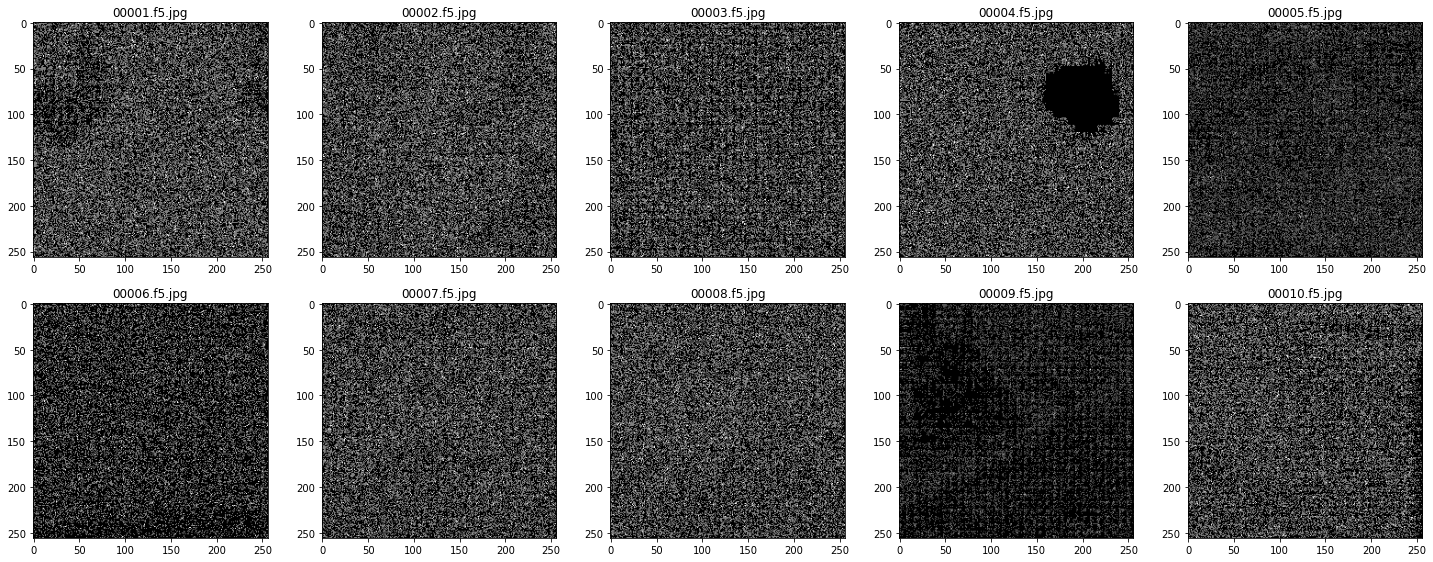

In [59]:
show_img(cover_path, stego_path, 10, 1)
